# WeatherPy


In [36]:
import json
import requests as req
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from citipy import citipy

import openweathermapy.core as ow

In [37]:
# Get random geo-coordinates 
lats = np.random.uniform(-90,90,1500)
longs = np.random.uniform(-180,180,1500)
zip_coord_cities = zip(lats, longs)


In [38]:
# Use citypy library for nearby cities
cities = []
for coordinate_pair in zip_coord_cities:
   lat, lon = coordinate_pair
   #city = citipy.nearest_city(lat, lon).city_name
   city = citipy.nearest_city(lat, lon)
   if city not in cities:
       cities.append(city)
print(len(cities))

613


In [39]:
# Create a dataframe for the cities list
cities_df = pd.DataFrame(cities)

In [40]:
# Get city name and corresponding country code
cities_name=[]
countrycode=[]
for city in cities:
    country = city.country_code
    name = city.city_name
    cities_name.append(name)
    countrycode.append(country)

cities_df['City']=cities_name
cities_df['Country']=countrycode
cities_df.head()

,0,City,Country
0,<citipy.citipy.City object at 0x000001BC4B044CC0>,vaini,to
1,<citipy.citipy.City object at 0x000001BC4B132FD0>,kodiak,us
2,<citipy.citipy.City object at 0x000001BC4A833080>,marcona,pe
3,<citipy.citipy.City object at 0x000001BC49D785F8>,marsa matruh,eg
4,<citipy.citipy.City object at 0x000001BC498D8A58>,cidreira,br


In [41]:
# Drop duplicate cities in 'City'
cities_df = cities_df.drop_duplicates("City")
cities_df.head()

,0,City,Country
0,<citipy.citipy.City object at 0x000001BC4B044CC0>,vaini,to
1,<citipy.citipy.City object at 0x000001BC4B132FD0>,kodiak,us
2,<citipy.citipy.City object at 0x000001BC4A833080>,marcona,pe
3,<citipy.citipy.City object at 0x000001BC49D785F8>,marsa matruh,eg
4,<citipy.citipy.City object at 0x000001BC498D8A58>,cidreira,br


In [42]:
api_key=""
cities_df["Latitude"] =""
cities_df["Temperature"] =""
cities_df["Humidity"] = ""
cities_df["Cloud Cover"] = ""
cities_df["Wind Speed"] = ""
cities_df["Date"] =""
cities_df.head()

,0,City,Country,Latitude,Temperature,Humidity,Cloud Cover,Wind Speed,Date
0,<citipy.citipy.City object at 0x000001BC4B044CC0>,vaini,to,,,,,,
1,<citipy.citipy.City object at 0x000001BC4B132FD0>,kodiak,us,,,,,,
2,<citipy.citipy.City object at 0x000001BC4A833080>,marcona,pe,,,,,,
3,<citipy.citipy.City object at 0x000001BC49D785F8>,marsa matruh,eg,,,,,,
4,<citipy.citipy.City object at 0x000001BC498D8A58>,cidreira,br,,,,,,


In [43]:
print(len(cities))

613


In [44]:
# Get api-key for openweathermap current weather api
api_key = "8f1b9cd4a84af0404d4d40da7aa2636c"

# Create an empty list to store our JSON response objects
#weather_data = []

# Loop through cities dataframe and run a weather search for each city
for index, row in cities_df.iterrows():
        url="http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&mode=json&APPID=%s" % (row["City"].replace(" ","+"), api_key)
        weather = req.get(url).json()
        try:
            cities_df.set_value(index, "Temperature", weather["main"]["temp"])
            cities_df.set_value(index, "Humidity", weather["main"]["humidity"])
            cities_df.set_value(index, "Cloud Cover", weather["clouds"]["all"])
            cities_df.set_value(index, "Wind Speed", weather["wind"]["speed"])
            cities_df.set_value(index, "Date", weather["dt"])
            cities_df.set_value(index, "Latitude", weather["coord"]["lat"])  
            
            print("City id: " + str(weather['id']) + " and City name: " + weather['name'])
            print(url) 
        
        except:
            print("Missing data. Skipping!!!")
               
        #weather_data.append(req.get(url).json())
#print(weather_data[0])

# Replace whitespaces in columns with NaN
# cities_df.replace(r'', np.NaN)  

# cities_df = cities_df.drop('0', 1)

# Remove all rows with NaN entries
# cities_df.dropna(how='any') 

# Fill NaN entries with 0

cities_df.fillna(0).head()

City id: 1273574 and City name: Vaini
http://api.openweathermap.org/data/2.5/weather?q=vaini&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 4407665 and City name: Kodiak
http://api.openweathermap.org/data/2.5/weather?q=kodiak&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
Missing data. Skipping!!!
City id: 352733 and City name: Marsa Matruh
http://api.openweathermap.org/data/2.5/weather?q=marsa+matruh&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3466165 and City name: Cidreira
http://api.openweathermap.org/data/2.5/weather?q=cidreira&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 4732862 and City name: Nome
http://api.openweathermap.org/data/2.5/weather?q=nome&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3424607 and City name: Tasiilaq
http://api.openweathermap.org/data/2.5/weather?q=tasiilaq&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id

City id: 2126199 and City name: Cherskiy
http://api.openweathermap.org/data/2.5/weather?q=cherskiy&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2069194 and City name: Jamestown
http://api.openweathermap.org/data/2.5/weather?q=jamestown&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
Missing data. Skipping!!!
City id: 2249901 and City name: Gat
http://api.openweathermap.org/data/2.5/weather?q=gat&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3985710 and City name: Cabo San Lucas
http://api.openweathermap.org/data/2.5/weather?q=cabo+san+lucas&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1272722 and City name: Dhone
http://api.openweathermap.org/data/2.5/weather?q=dhone&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 4021858 and City name: Guerrero Negro
http://api.openweathermap.org/data/2.5/weather?q=guerrero+negro&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4

City id: 3860443 and City name: Comodoro Rivadavia
http://api.openweathermap.org/data/2.5/weather?q=comodoro+rivadavia&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3421765 and City name: Nanortalik
http://api.openweathermap.org/data/2.5/weather?q=nanortalik&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 4035715 and City name: Avarua
http://api.openweathermap.org/data/2.5/weather?q=avarua&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3397851 and City name: Itupiranga
http://api.openweathermap.org/data/2.5/weather?q=itupiranga&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 328880 and City name: Dire
http://api.openweathermap.org/data/2.5/weather?q=dire&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1152222 and City name: Mae Hong Son
http://api.openweathermap.org/data/2.5/weather?q=mae+hong+son&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c

City id: 4034551 and City name: Faanui
http://api.openweathermap.org/data/2.5/weather?q=faanui&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2171722 and City name: Charters Towers
http://api.openweathermap.org/data/2.5/weather?q=charters+towers&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1865309 and City name: Katsuura
http://api.openweathermap.org/data/2.5/weather?q=katsuura&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 6068416 and City name: Mayo
http://api.openweathermap.org/data/2.5/weather?q=mayo&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2121385 and City name: Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?q=severo-kurilsk&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
Missing data. Skipping!!!
City id: 1529651 and City name: Altay
http://api.openweathermap.org/data/2.5/weather?q=altay&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d4

City id: 2289887 and City name: Divo
http://api.openweathermap.org/data/2.5/weather?q=divo&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 364933 and City name: Umm Kaddadah
http://api.openweathermap.org/data/2.5/weather?q=umm+kaddadah&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 5851349 and City name: Nanakuli
http://api.openweathermap.org/data/2.5/weather?q=nanakuli&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1785974 and City name: Yuci
http://api.openweathermap.org/data/2.5/weather?q=yuci&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1799908 and City name: Nanlong
http://api.openweathermap.org/data/2.5/weather?q=nanlong&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 6316343 and City name: Alta Floresta
http://api.openweathermap.org/data/2.5/weather?q=alta+floresta&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2025256 and Ci

City id: 2139521 and City name: Noumea
http://api.openweathermap.org/data/2.5/weather?q=noumea&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1521315 and City name: Lisakovsk
http://api.openweathermap.org/data/2.5/weather?q=lisakovsk&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2033196 and City name: Zhangjiakou
http://api.openweathermap.org/data/2.5/weather?q=zhangjiakou&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 5313135 and City name: Sonoita
http://api.openweathermap.org/data/2.5/weather?q=sonoita&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 5864145 and City name: Homer
http://api.openweathermap.org/data/2.5/weather?q=homer&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3453439 and City name: Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?q=ponta+do+sol&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
Missing data. Skip

City id: 2127202 and City name: Anadyr
http://api.openweathermap.org/data/2.5/weather?q=anadyr&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2377450 and City name: Nouakchott
http://api.openweathermap.org/data/2.5/weather?q=nouakchott&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2409914 and City name: Bonthe
http://api.openweathermap.org/data/2.5/weather?q=bonthe&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1337610 and City name: Thinadhoo
http://api.openweathermap.org/data/2.5/weather?q=thinadhoo&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
Missing data. Skipping!!!
City id: 4568138 and City name: San Juan
http://api.openweathermap.org/data/2.5/weather?q=san+juan&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 757718 and City name: Smolenka
http://api.openweathermap.org/data/2.5/weather?q=smolenka&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c

City id: 2094027 and City name: Kieta
http://api.openweathermap.org/data/2.5/weather?q=kieta&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
Missing data. Skipping!!!
City id: 3645532 and City name: Ciudad Bolivar
http://api.openweathermap.org/data/2.5/weather?q=ciudad+bolivar&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3471451 and City name: Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?q=arraial+do+cabo&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 245669 and City name: Adre
http://api.openweathermap.org/data/2.5/weather?q=adre&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1796663 and City name: Sanming
http://api.openweathermap.org/data/2.5/weather?q=sanming&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1509847 and City name: Bograd
http://api.openweathermap.org/data/2.5/weather?q=bograd&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da

City id: 3526662 and City name: Teya
http://api.openweathermap.org/data/2.5/weather?q=teya&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2872126 and City name: Meitingen
http://api.openweathermap.org/data/2.5/weather?q=meitingen&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1724435 and City name: Siocon
http://api.openweathermap.org/data/2.5/weather?q=siocon&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2092164 and City name: Lorengau
http://api.openweathermap.org/data/2.5/weather?q=lorengau&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1701054 and City name: Marawi
http://api.openweathermap.org/data/2.5/weather?q=marawi&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 502265 and City name: Mirnyy
http://api.openweathermap.org/data/2.5/weather?q=mirnyy&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3403687 and City name: Camocim
h

City id: 1253628 and City name: Lata
http://api.openweathermap.org/data/2.5/weather?q=lata&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 98182 and City name: Baghdad
http://api.openweathermap.org/data/2.5/weather?q=baghdad&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2120591 and City name: Tilichiki
http://api.openweathermap.org/data/2.5/weather?q=tilichiki&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3664980 and City name: Boa Vista
http://api.openweathermap.org/data/2.5/weather?q=boa+vista&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2037886 and City name: Dandong
http://api.openweathermap.org/data/2.5/weather?q=dandong&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 5393052 and City name: Santa Cruz
http://api.openweathermap.org/data/2.5/weather?q=santa+cruz&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1079048 and City na

City id: 3533462 and City name: Acapulco
http://api.openweathermap.org/data/2.5/weather?q=acapulco&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 780717 and City name: Batsfjord
http://api.openweathermap.org/data/2.5/weather?q=batsfjord&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2347470 and City name: Bauchi
http://api.openweathermap.org/data/2.5/weather?q=bauchi&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1507116 and City name: Dudinka
http://api.openweathermap.org/data/2.5/weather?q=dudinka&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
Missing data. Skipping!!!
City id: 4034188 and City name: Moerai
http://api.openweathermap.org/data/2.5/weather?q=moerai&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1254832 and City name: Tawang
http://api.openweathermap.org/data/2.5/weather?q=tawang&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 

,0,City,Country,Latitude,Temperature,Humidity,Cloud Cover,Wind Speed,Date
0,<citipy.citipy.City object at 0x000001BC4B044CC0>,vaini,to,15.34,72.58,53,0,5.35,1518832750
1,<citipy.citipy.City object at 0x000001BC4B132FD0>,kodiak,us,39.95,26.6,58,1,3.36,1518828780
2,<citipy.citipy.City object at 0x000001BC4A833080>,marcona,pe,,,,,,
3,<citipy.citipy.City object at 0x000001BC49D785F8>,marsa matruh,eg,31.35,50,87,40,8.05,1518829200
4,<citipy.citipy.City object at 0x000001BC498D8A58>,cidreira,br,-30.17,69.75,79,20,13.29,1518832751


In [45]:
print(json.dumps(weather, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 36
    },
    "cod": 200,
    "coord": {
        "lat": 66.83,
        "lon": 70.83
    },
    "dt": 1518832961,
    "id": 1486321,
    "main": {
        "grnd_level": 1033.24,
        "humidity": 70,
        "pressure": 1033.24,
        "sea_level": 1034.53,
        "temp": 1.8,
        "temp_max": 1.8,
        "temp_min": 1.8
    },
    "name": "Yar-Sale",
    "sys": {
        "country": "RU",
        "message": 0.0033,
        "sunrise": 1518837596,
        "sunset": 1518867767
    },
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 239.003,
        "speed": 8.77
    }
}


In [46]:
# Save our Cities DataFrame as csv file
cities_df.to_csv("equatorial_cities.csv", encoding="utf-8", index=False)

In [47]:
cities_df.head()

,0,City,Country,Latitude,Temperature,Humidity,Cloud Cover,Wind Speed,Date
0,<citipy.citipy.City object at 0x000001BC4B044CC0>,vaini,to,15.34,72.58,53,0,5.35,1518832750
1,<citipy.citipy.City object at 0x000001BC4B132FD0>,kodiak,us,39.95,26.6,58,1,3.36,1518828780
2,<citipy.citipy.City object at 0x000001BC4A833080>,marcona,pe,,,,,,
3,<citipy.citipy.City object at 0x000001BC49D785F8>,marsa matruh,eg,31.35,50,87,40,8.05,1518829200
4,<citipy.citipy.City object at 0x000001BC498D8A58>,cidreira,br,-30.17,69.75,79,20,13.29,1518832751


In [48]:
cities_df.dtypes

0              object
City           object
Country        object
Latitude       object
Temperature    object
Humidity       object
Cloud Cover    object
Wind Speed     object
Date           object
dtype: object

In [49]:
cities_df[['Latitude','Temperature', 'Humidity', 'Cloud Cover', 'Wind Speed']] = cities_df[['Latitude','Temperature', 'Humidity', 'Cloud Cover', 'Wind Speed']].apply(pd.to_numeric)

In [50]:
cities_df.dtypes

0               object
City            object
Country         object
Latitude       float64
Temperature    float64
Humidity       float64
Cloud Cover    float64
Wind Speed     float64
Date            object
dtype: object

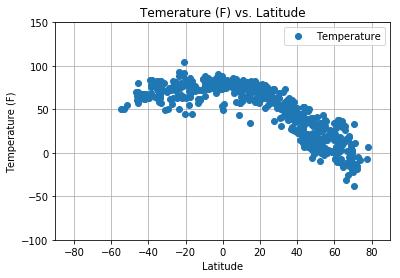

In [51]:
# Build a scatter plot for each data type

# plt.scatter(x = cities_df["Temperature"], y = cities_df["Latitude"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Latitude")

# plt.scatter(x=df['col2'], y=df['col4'], s=120, c='b', label='Highly Active')

# cities_df.plt.scatter(x = "Temperature", y = "Latitude",edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Latitude")

# plt.scatter(cities_df["Temperature"], cities_df["Latitude"])

cities_df.plot(x ='Latitude', y='Temperature', style='o')

# Incorporate the other graph properties
plt.title("Temerature (F) vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-100,150])

# Save the figure
plt.savefig("Temp-Lat.png")

# Show plot
plt.show()



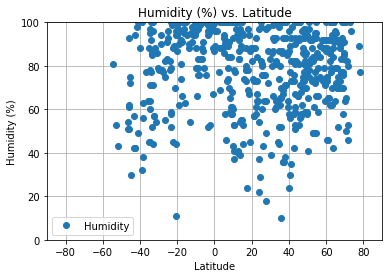

In [52]:
cities_df.plot(x ='Latitude', y ='Humidity', style='o')

# Incorporate the other graph properties
plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([0,100])

# Save the figure
plt.savefig("Humid-Lat.png")

# Show plot
plt.show()


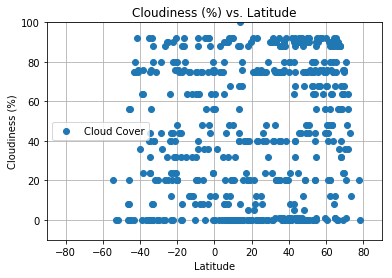

In [53]:
cities_df.plot(x ='Latitude', y ='Cloud Cover', style='o')

# Incorporate the other graph properties
plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-10,100])

# Save the figure
plt.savefig("Cloud-Lat.png")

# Show plot
plt.show()


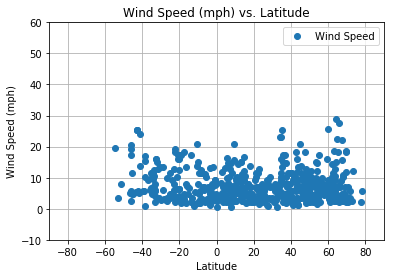

In [54]:
cities_df.plot(x ='Latitude', y ='Wind Speed', style='o')

# Incorporate the other graph properties
plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-10,60])

# Save the figure
plt.savefig("Wind-Lat.png")

# Show plot
plt.show()


In [55]:

# Observable Trends:
    
#     1. Temperature is maximum at cities near the equator and gradually drops as distance from the equator increases.
#     2. Majority of our cities have very high humidity (over 60%) and many have even 100% humidity which could be attributed to rainfall in large rain forests in the equatorial regions.
#     3. Wind speed is generally not dependent on latitude (between 0 and 20 mph) except when latitude is above 40 degrees.
#     4. Cloud coverage in general is independent of latitude even though many of these cities have almost no cloud coverage at al